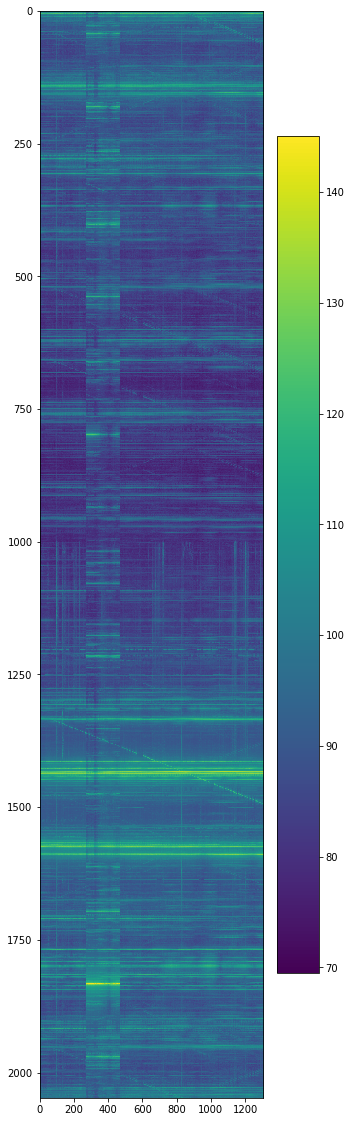

In [1]:
import scipy.io as sio
import numpy as np

mat0 = sio.loadmat("pool0.mat")
mat1 = sio.loadmat("pool1.mat")

tot = np.hstack((mat0['pooled'], mat1['pooled']))
tot.shape

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 20]
plt.imshow(tot, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()

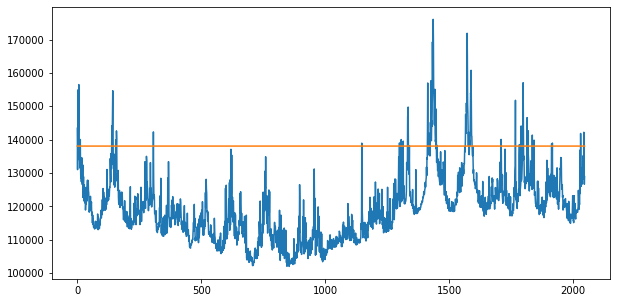

In [15]:
import numpy as np

sums = []
for row in tot:
    sums.append(np.sum(row))
    
import statistics

# standard deviation factor
std_factor = 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(sums)
plt.plot([i for i in range(0, len(sums))], [np.median(sums)+std_factor*np.std(sums) for i in range(0, len(sums))])
plt.show()

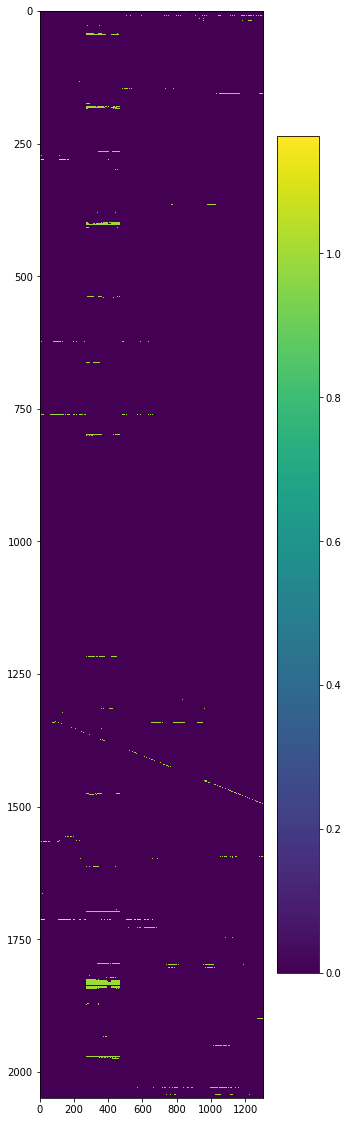

In [16]:
thresh = np.mean(sums)+std_factor*np.std(sums)

import numpy as np
threshold = lambda x: x if x < thresh else 0
tfunc = np.vectorize(threshold)
cor = tfunc(sums)

count = 0
fina = np.asarray(np.zeros(len(tot[0])))

div = lambda x: x/1e2 if x>110 else 0
divFunc = np.vectorize(div)

for row in tot:
    if (cor[count] == 0):
        fina = np.vstack((fina, np.zeros(len(row))))
    else:
        fina = np.vstack((fina, divFunc(row)))
    count += 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 20]
plt.imshow(fina, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

In [17]:
tot.shape

(2048, 1304)

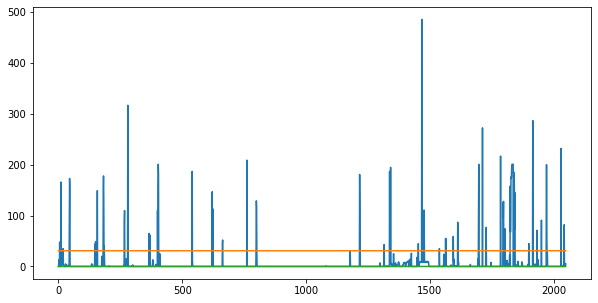

In [18]:
sec_std_factor = 1
third = 0

second_sums = []
for row in fina:
    val = np.sum(row)
    second_sums.append(val)
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(second_sums)
plt.plot([i for i in range(0, len(second_sums))], [np.median(second_sums)+sec_std_factor*np.std(second_sums) for i in range(0, len(second_sums))])
plt.plot([i for i in range(0, len(second_sums))], [np.median(second_sums)-third*np.std(second_sums) for i in range(0, len(second_sums))])
plt.show()

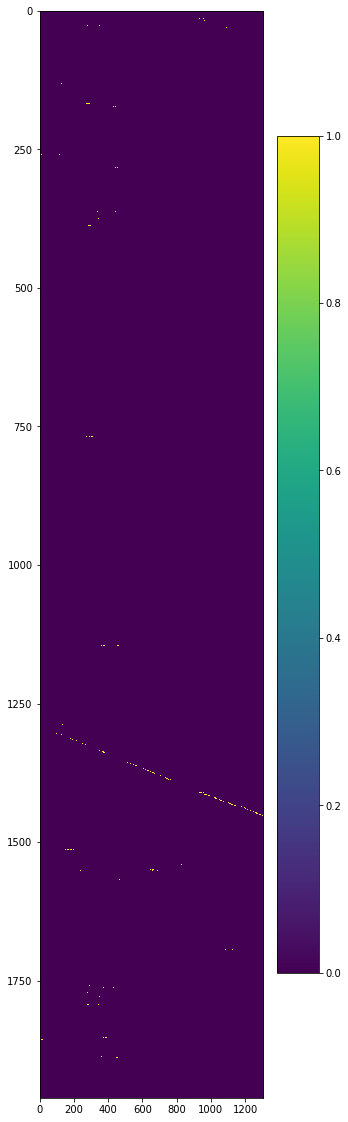

In [19]:
count = 0
true_final = np.asarray(np.zeros(len(fina[0])))


for row in fina:
    if (second_sums[count] < np.median(second_sums)+sec_std_factor*np.std(second_sums)):
        true_final = np.vstack((true_final, row))
    count += 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 20]
plt.imshow(true_final, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

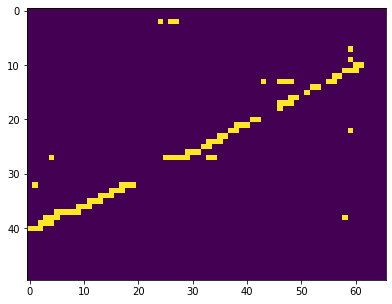

In [41]:
import skimage.measure


# if this don't work change conda environment for older version of numpy

pool_img = skimage.measure.block_reduce(true_final, (5,20), np.max)

img = np.fliplr(pool_img[250:300])
plt.imshow(img)

50
Progress: 10% - 20% - 30% - 40% - 50% - 60% - 70% - 80% - 90% - 100% - 

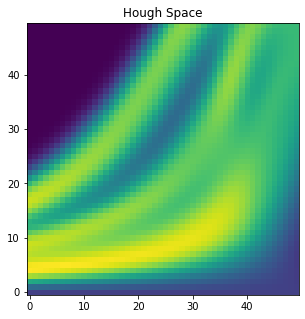

In [42]:


NTHETA = 50
NB = 50
print(len(img))
houghm = np.zeros((NTHETA, NB))

M, N = img.shape
X,Y = np.ix_(np.arange(M), np.arange(N))
SIGMA = 5

print('Progress: ', end='')
tidx = 0
for theta in np.linspace(0, np.pi / 2, NTHETA):
    ridx = 0
    for b in np.linspace(-img.shape[0], img.shape[0], NB):
        dists = np.exp(-np.square(X * np.sin(np.pi / 2 - theta) - (Y - b) * np.cos(np.pi / 2 - theta)) / 2 / np.square(SIGMA))
        houghm[tidx, ridx] = np.sum(img * dists)
        ridx += 1
    tidx += 1
    prep = int(tidx/NTHETA*100)
    if prep % 5 == 0:
        print(f'{prep}% - ', end='')

plt.imshow(houghm, origin='lower')
plt.title('Hough Space')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

TypeError: 'NoneType' object is not subscriptable

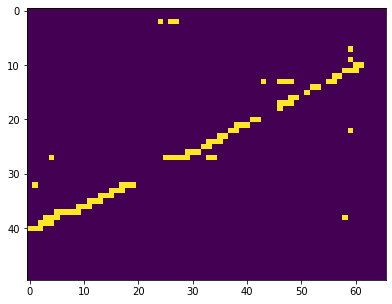

4
0
0.1282282715750936
-50.0


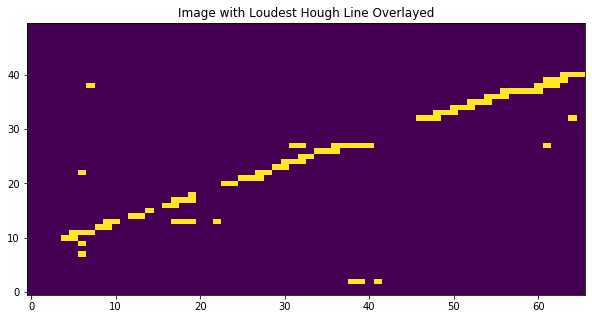

In [44]:
def tbline(theta, b):
    '''Return a function for a line parametrized by theta and its y-intercept (b)'''
    return lambda x: np.tan(theta) * x - b

[tlr, blr] = np.unravel_index(np.argmax(houghm), houghm.shape)
print(tlr)
print(blr)
tl = np.linspace(0, np.pi / 2, NTHETA)[tlr]
bl = np.linspace(-img.shape[0], img.shape[0], NB)[blr]


print(tl)
print(bl)

xl = np.arange(0, img.shape[1], 1)
func = tbline(tl, bl)
yl = func(xl)

xl = xl[np.logical_and(yl < img.shape[1], yl >= 0).nonzero()].astype(int)
yl = yl[np.logical_and(yl < img.shape[1], yl >= 0).nonzero()].astype(int)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(np.flip(img, axis=1), origin='lower', aspect='auto')
plt.title('Image with Loudest Hough Line Overlayed')



plt.show()